 # Tensorflow image processing API
 - [How PNG Works](https://medium.com/@duhroach/how-png-works-f1174e3cc7b7)
 - using the [tf.image](https://www.tensorflow.org/api_guides/python/image) Tensorflow module
 - There is a function called [tf.contrib.image.rotate](https://www.tensorflow.org/api_docs/python/tf/contrib/image/rotate). However, with this function, you can only rotate all images by a fixed angle. I could not find a way to rotate each image in each batch by a random angle.

In [1]:
import tensorflow as tf

In [2]:
import cv2

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
image1 = mpimg.imread('stopsign.png')
image1.shape

(356, 407, 4)

In [5]:
image2 = mpimg.imread('speed20.png')
image2.shape

(32, 32, 4)

In [6]:
image1[:,:,0:3].shape

(356, 407, 3)

### Change the image into RGB

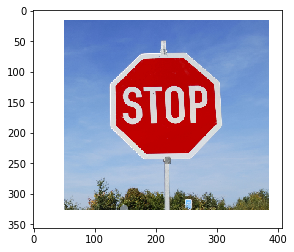

In [7]:
image_rgb = image1[:,:,0:3]
plt.imshow(image_rgb)
plt.show()

### Convert RGB into Grayscale by Opencv

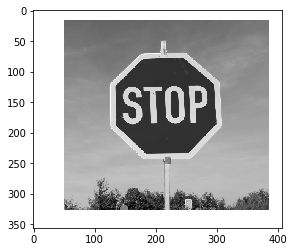

In [9]:
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

In [11]:
gray.shape

(356, 407)

### Convert RGB into Grayscale by Tensorflow

In [18]:
gray_tf = tf.image.rgb_to_grayscale(image_rgb)
gray_tf

<tf.Tensor 'rgb_to_grayscale_1:0' shape=(356, 407, 1) dtype=float32>

(356, 407, 1)
(356, 407)


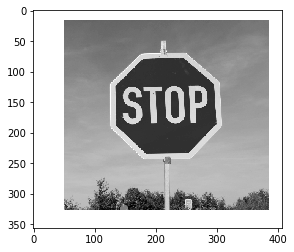

In [21]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    image_tensor = sess.run(gray_tf)
    print(image_tensor.shape)
    print(image_tensor[:,:,-1].shape)
    
plt.imshow(image_tensor[:,:,-1],cmap='gray')
plt.show()

## Resize images

In [22]:
resized_img = tf.image.resize_images(image_rgb,(32,32))
resized_img

<tf.Tensor 'Squeeze:0' shape=(32, 32, 3) dtype=float32>

(32, 32, 3)
(32, 32)


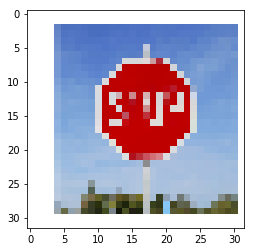

In [24]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    image_tensor = sess.run(resized_img)
    print(image_tensor.shape)
    print(image_tensor[:,:,-1].shape)
    
plt.imshow(image_tensor)
plt.show()

## Cropping

In [25]:
cropped_img = tf.image.central_crop(image_rgb,0.5)
cropped_img

<tf.Tensor 'Slice:0' shape=(?, ?, 3) dtype=float32>

(178, 205, 3)
(178, 205)


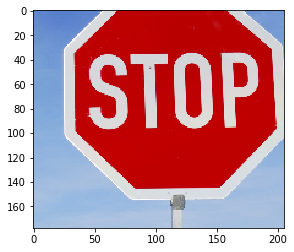

In [26]:
with tf.Session() as sess:
    image_tensor = sess.run(cropped_img)
    print(image_tensor.shape)
    print(image_tensor[:,:,-1].shape)
    
plt.imshow(image_tensor)
plt.show()

## Flipping, Rotating and Transposing

In [37]:
#flipped_img = tf.image.flip_up_down(image_rgb)
#flipped_img = tf.image.random_flip_up_down(image_rgb)
#flipped_img = tf.image.flip_left_right(image_rgb)
flipped_img = tf.image.random_flip_left_right(image_rgb)
flipped_img

<tf.Tensor 'Reverse_5:0' shape=(356, 407, 3) dtype=float32>

(356, 407, 3)
(356, 407)


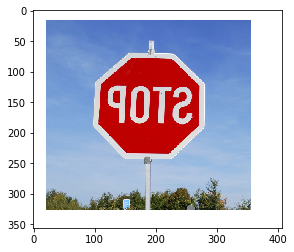

In [38]:
with tf.Session() as sess:
    image_tensor = sess.run(flipped_img)
    print(image_tensor.shape)
    print(image_tensor[:,:,-1].shape)
    
plt.imshow(image_tensor)
plt.show()

In [39]:
trasposed_img = tf.image.transpose_image(image_rgb)
trasposed_img

<tf.Tensor 'transpose_image:0' shape=(407, 356, 3) dtype=float32>

(407, 356, 3)
(407, 356)


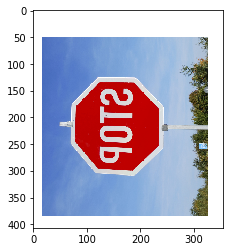

In [40]:
with tf.Session() as sess:
    image_tensor = sess.run(trasposed_img)
    print(image_tensor.shape)
    print(image_tensor[:,:,-1].shape)
    
plt.imshow(image_tensor)
plt.show()

In [41]:
rot_img = tf.image.rot90(image_rgb,1)
rot_img

<tf.Tensor 'rot90/If_3/Merge:0' shape=(?, ?, 3) dtype=float32>

(407, 356, 3)
(407, 356)


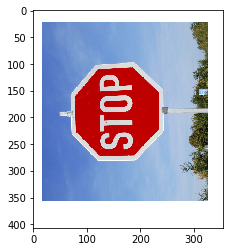

In [42]:
with tf.Session() as sess:
    image_tensor = sess.run(rot_img)
    print(image_tensor.shape)
    print(image_tensor[:,:,-1].shape)
    
plt.imshow(image_tensor)
plt.show()